Statistical Business Analysis: Conduct hypothesis tests on sales data, analyze correlations between marketing spend and revenue, provide statistical insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('D:\Developer Arena/data.csv', encoding='latin')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
# Create Revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

In [4]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

In [5]:
print("Data Loaded Successfully!")
print(df.head())

Data Loaded Successfully!
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  


In [6]:
print("\n===== SUMMARY STATISTICS =====")
print(df[["Quantity", "UnitPrice", "Revenue"]].describe())


===== SUMMARY STATISTICS =====
            Quantity      UnitPrice        Revenue
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114      17.987795
std       218.081158      96.759853     378.810824
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.400000
50%         3.000000       2.080000       9.750000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000


In [7]:
#Negative revenue (returns)
neg_rev = df[df["Revenue"] < 0]
print(f"\nNegative revenue rows = {len(neg_rev)}")


Negative revenue rows = 9290



===== CORRELATION MATRIX =====
           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.001235  0.886681
UnitPrice -0.001235   1.000000 -0.162029
Revenue    0.886681  -0.162029  1.000000


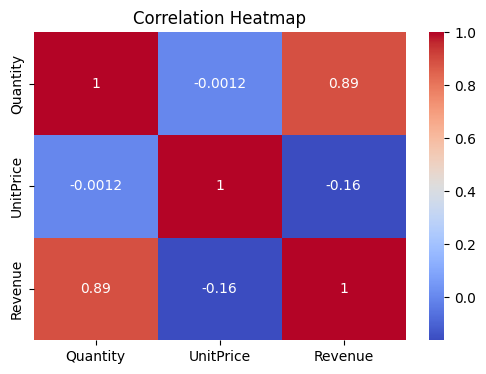

In [8]:
#3. Correlation Analysis
numeric_cols = ["Quantity", "UnitPrice", "Revenue"]
corr = df[numeric_cols].corr()

print("\n===== CORRELATION MATRIX =====")
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
#4.Hypothesis Testing

# T-test: UK vs Others revenue comparison
uk = df[df["Country"] == "United Kingdom"]["Revenue"]
others = df[df["Country"] != "United Kingdom"]["Revenue"]

t_stat, p_val = stats.ttest_ind(uk, others, equal_var=False)

print("\n===== T-TEST: UK vs Other Countries =====")
print(f"T-statistic = {t_stat}")
print(f"P-value = {p_val}")




===== T-TEST: UK vs Other Countries =====
T-statistic = -23.030212729521747
P-value = 3.2109401580337504e-117


In [10]:
#ANOVA across top 5 countries
top_countries = df["Country"].value_counts().head(5).index
anova_data = [df[df["Country"] == c]["Revenue"] for c in top_countries]

f_stat, p_val_anova = stats.f_oneway(*anova_data)

print("\n===== ANOVA: Top 5 Countries Revenue =====")
print(f"F-statistic = {f_stat}")
print(f"P-value = {p_val_anova}")


===== ANOVA: Top 5 Countries Revenue =====
F-statistic = 4.632256675781373
P-value = 0.0009724529216110667


In [11]:
#5. Regression Model

# Aggregate revenue per invoice
invoice_data = df.groupby("InvoiceNo").agg({
    "Quantity": "sum",
    "UnitPrice": "mean",
    "Revenue": "sum"
}).reset_index()

X = invoice_data[["Quantity", "UnitPrice"]]
y = invoice_data["Revenue"]

# Add constant
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("\n===== REGRESSION MODEL SUMMARY =====")
print(model.summary())




===== REGRESSION MODEL SUMMARY =====
                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 4.974e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:21:36   Log-Likelihood:            -2.1336e+05
No. Observations:               25900   AIC:                         4.267e+05
Df Residuals:                   25897   BIC:                         4.267e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

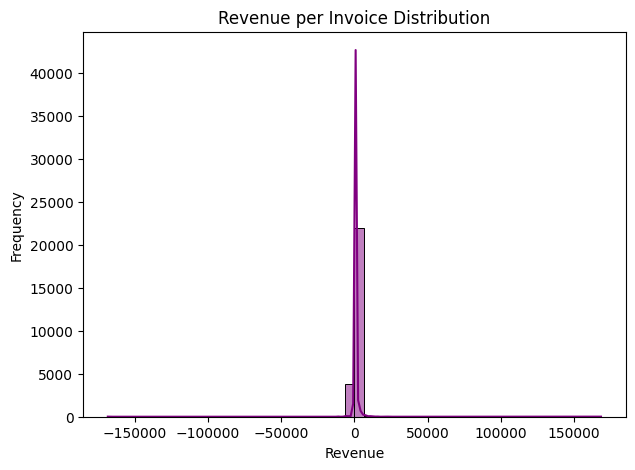

In [12]:
#6. Visualizations (Seaborn)


# Revenue Distribution
plt.figure(figsize=(7,5))
sns.histplot(invoice_data["Revenue"], bins=50, kde=True, color="purple")
plt.title("Revenue per Invoice Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

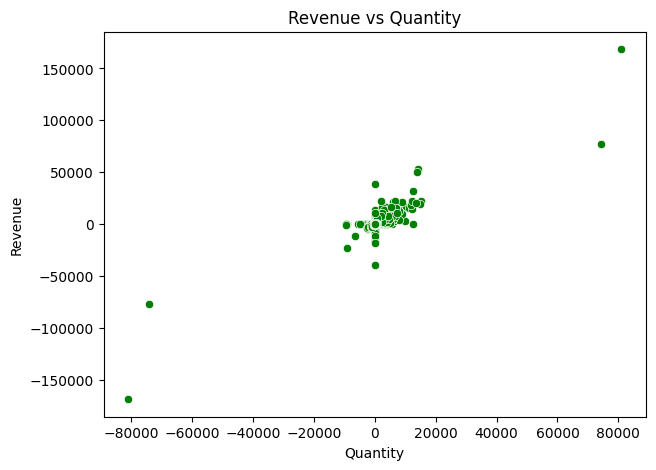

In [13]:
# Revenue vs Quantity
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=invoice_data,
    x="Quantity",
    y="Revenue",
    color="green"
)
plt.title("Revenue vs Quantity")
plt.show()

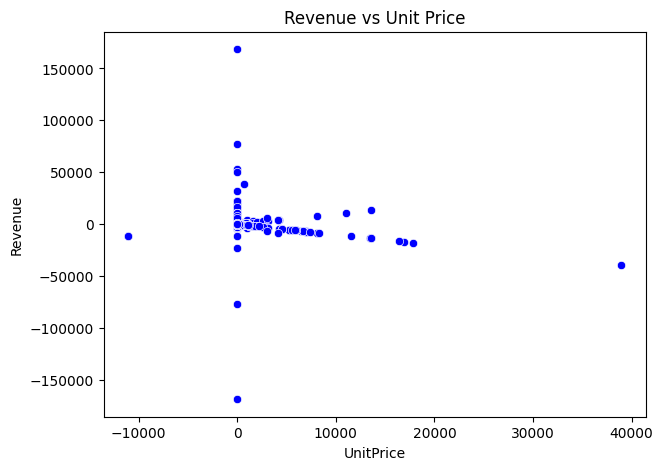


Analysis Complete!


In [14]:
# Unit Price vs Revenue
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=invoice_data,
    x="UnitPrice",
    y="Revenue",
    color="blue"
)
plt.title("Revenue vs Unit Price")
plt.show()

print("\nAnalysis Complete!")
